In [1]:
from google.colab import auth
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Import data

In [2]:
auth.authenticate_user()

import gspread
from oauth2client.client import GoogleCredentials

gc = gspread.authorize(GoogleCredentials.get_application_default())

worksheet = gc.open('Analytics data').sheet1

# get_all_values gives a list of rows.
rows = worksheet.get_all_values()


In [3]:
# Convert to a DataFrame and render.
date_df = pd.DataFrame.from_records(rows[1:], columns=rows[0])
date_df.head()

,Date,Users,New Users,Avg. Session Duration,Pages / Session
0,12/1/2019,13,10,0:00:40,2.38
1,12/2/2019,40,33,0:01:18,2.8
2,12/3/2019,52,43,0:02:31,3.25
3,12/4/2019,44,33,0:00:44,2.11
4,12/5/2019,39,32,0:01:03,2.07


In [4]:
worksheet = gc.open('Analytics data').worksheet('Sheet2')
rows = worksheet.get_all_values()
segments_df = pd.DataFrame.from_records(rows[1:], columns=rows[0])
segments_df.head()

,In-Market Segment,Users,New Users,Sessions,Pages / Session,Avg. Session Duration
0,Home & Garden/Home Improvement,896,865,"1,195",3.02,0:02:21
1,Employment,814,797,"1,054",2.87,0:02:24
2,Real Estate/Residential Properties/Residential...,761,742,973,3.07,0:02:08
3,Home & Garden/Home Decor,713,698,890,2.96,0:02:00
4,Home & Garden/Home & Garden Services,681,660,898,3.03,0:02:17


## Clean data

In [5]:
date_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Date                   366 non-null    object
 1   Users                  366 non-null    object
 2   New Users              366 non-null    object
 3   Avg. Session Duration  366 non-null    object
 4   Pages / Session        366 non-null    object
dtypes: object(5)
memory usage: 14.4+ KB


In [6]:
date_df['Date'] = pd.to_datetime(date_df['Date'])
date_df = date_df.set_index('Date')
date_df['Users'] = date_df['Users'].astype('int')
date_df['New Users'] = date_df['New Users'].astype('int')
date_df['Avg. Session Duration'] = pd.to_timedelta(date_df['Avg. Session Duration'])
date_df['Pages / Session'] = date_df['Pages / Session'].astype('float')
date_df.loc[date_df.index<'2020-11-15','Version'] = 'Old'
date_df.loc[date_df.index>='2020-11-15','Version'] = 'New'
date_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 366 entries, 2019-12-01 to 2020-11-30
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype          
---  ------                 --------------  -----          
 0   Users                  366 non-null    int64          
 1   New Users              366 non-null    int64          
 2   Avg. Session Duration  366 non-null    timedelta64[ns]
 3   Pages / Session        366 non-null    float64        
 4   Version                366 non-null    object         
dtypes: float64(1), int64(2), object(1), timedelta64[ns](1)
memory usage: 17.2+ KB


In [7]:
date_df.sample(5)

,Users,New Users,Avg. Session Duration,Pages / Session,Version
Date,,,,,
2020-06-22,40,37,0 days 00:01:25,2.20,Old
2020-05-14,29,24,0 days 00:00:57,2.23,Old
2020-06-13,29,26,0 days 00:00:02,1.20,Old
2020-09-30,52,48,0 days 00:01:35,2.11,Old
2020-09-21,80,75,0 days 00:01:12,2.07,Old


In [8]:
segments_df['Users'] = segments_df['Users'].astype('int')
segments_df['New Users'] = segments_df['New Users'].astype('int')
segments_df['Avg. Session Duration'] = pd.to_timedelta(segments_df['Avg. Session Duration'])
segments_df['Pages / Session'] = segments_df['Pages / Session'].astype('float')
segments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype          
---  ------                 --------------  -----          
 0   In-Market Segment      10 non-null     object         
 1   Users                  10 non-null     int64          
 2   New Users              10 non-null     int64          
 3   Sessions               10 non-null     object         
 4   Pages / Session        10 non-null     float64        
 5   Avg. Session Duration  10 non-null     timedelta64[ns]
dtypes: float64(1), int64(2), object(2), timedelta64[ns](1)
memory usage: 608.0+ bytes


## Examine data

Most of the users are new users, as demonstrated by the following graphs. The _User_ and _New User_ rate is very close and highly-correlated month-to-month, and a pie chart shows the distribution of returning users to new users, indicating that few new users return to the website.

In [9]:
segments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype          
---  ------                 --------------  -----          
 0   In-Market Segment      10 non-null     object         
 1   Users                  10 non-null     int64          
 2   New Users              10 non-null     int64          
 3   Sessions               10 non-null     object         
 4   Pages / Session        10 non-null     float64        
 5   Avg. Session Duration  10 non-null     timedelta64[ns]
dtypes: float64(1), int64(2), object(2), timedelta64[ns](1)
memory usage: 608.0+ bytes


In [10]:
date_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 366 entries, 2019-12-01 to 2020-11-30
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype          
---  ------                 --------------  -----          
 0   Users                  366 non-null    int64          
 1   New Users              366 non-null    int64          
 2   Avg. Session Duration  366 non-null    timedelta64[ns]
 3   Pages / Session        366 non-null    float64        
 4   Version                366 non-null    object         
dtypes: float64(1), int64(2), object(1), timedelta64[ns](1)
memory usage: 17.2+ KB


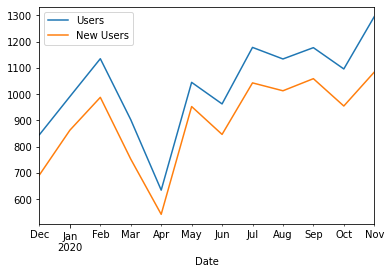

In [11]:
_ = date_df.resample('M')[['Users','New Users']].sum().plot()

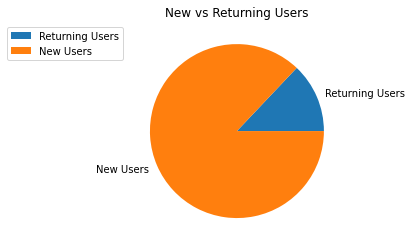

In [12]:
returning_users = date_df['Users'].sum() - date_df['New Users'].sum()
_ = plt.pie([returning_users,date_df['New Users'].sum()], labels=['Returning Users','New Users'])
_ = plt.legend(bbox_to_anchor=(0,1))
_ = plt.title('New vs Returning Users')

This makes sense, on some level--there will always be more "new" visitors than returning visitors, as every "returning" visitor was, at least at some point, a "new" visitor themselves. Nonetheless, the split seems very high. Comparing the old website to the new reveals an even worse split, but the data is very limited for the new website:

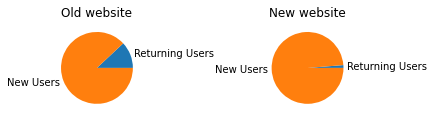

In [13]:
old = date_df['Version'] == 'Old'
old_returning_users = date_df.loc[old,'Users'].sum() - date_df.loc[old,'New Users'].sum()
new = date_df['Version'] == 'New'
new_returning_users = date_df.loc[new,'Users'].sum() - date_df.loc[new,'New Users'].sum()

plt.subplot(121)
_ = plt.pie([old_returning_users, date_df['New Users'].sum()], labels=['Returning Users','New Users'])
_ = plt.title('Old website')
plt.subplot(122)
_ = plt.pie([new_returning_users, date_df['New Users'].sum()], labels=['Returning Users','New Users'])
_ = plt.title('New website')
_ = plt.tight_layout()
_ = plt.show()

_(Note: Put numbers in a matrix. Present data via bars.)_

Website visitors are dominated by the Home & Garden and Real Estate markets. This makes sense. Employment and Travel is unusual; Financial Services may be creditors.

In [14]:
segments_df.loc[segments_df['In-Market Segment'].str.contains('Home & Garden'), 'Super-Segment'] = 'Home & Garden'
segments_df.loc[segments_df['In-Market Segment'].str.contains('Real Estate'), 'Super-Segment'] = 'Real Estate'
segments_df.loc[segments_df['In-Market Segment'].str.contains('Travel'), 'Super-Segment'] = 'Travel'
segments_df.loc[segments_df['In-Market Segment'].str.contains('Financial Services'), 'Super-Segment'] = 'Financial Services'
segments_df.loc[segments_df['In-Market Segment'].str.contains('Employment'), 'Super-Segment'] = 'Employment'

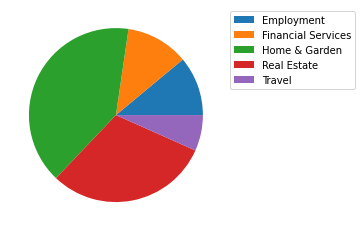

In [15]:
_ = plt.pie(segments_df.groupby('Super-Segment')['Avg. Session Duration'].sum())
_ = plt.legend(segments_df.groupby('Super-Segment')['Avg. Session Duration'].sum().index, bbox_to_anchor=(1,1))

The website has a brand-new structure after redesign. Are visitors engaging with the site more now?

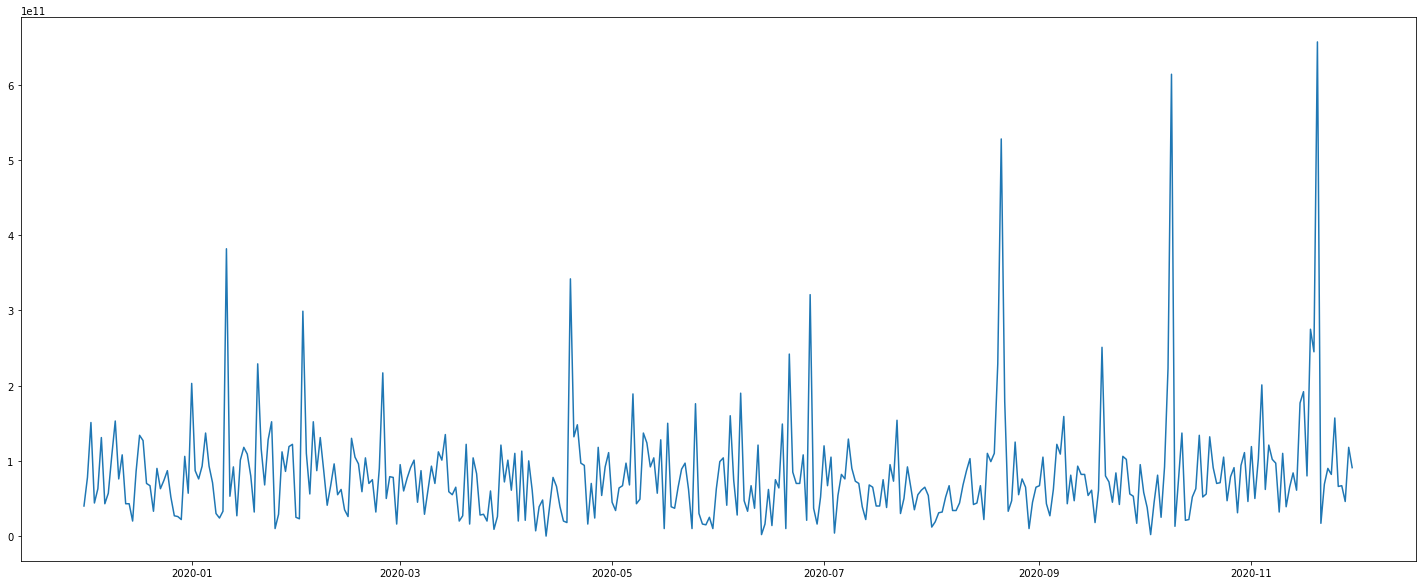

In [16]:
_ = plt.figure(figsize=(25,10))
_ = plt.plot(date_df['Avg. Session Duration'])

While there is no discernible pattern, there are spikes that occur later on in the year.

In [17]:
date_df.loc[date_df['Avg. Session Duration'] > '00:05:00',:]

,Users,New Users,Avg. Session Duration,Pages / Session,Version
Date,,,,,
2020-01-11,9,8,0 days 00:06:22,3.67,Old
2020-04-19,9,9,0 days 00:05:42,3.40,Old
2020-06-27,9,8,0 days 00:05:21,2.89,Old
2020-08-21,28,23,0 days 00:08:48,3.81,Old
2020-10-09,30,25,0 days 00:10:14,3.61,Old
2020-11-20,40,27,0 days 00:10:57,5.07,New
